<a href="https://colab.research.google.com/github/ANDRERAIMUNDO/atividade-03-PPGCC-2025_1/blob/main/Atividade_03_PPGCC_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão A

Situação: seguindo as mesmas diretrizes políticas e organizacionais como foi descrito na Atividade 02, umas das regras alinhadas às estratégias de negócios da empresa é manter problemas operacionais sempre abaixo de 6%. Os resultados obtidos mostram que todas as demandas de incidentes da empresa estão dentro dos parâmetros aceitos pela companhia com média não superior a 6.

 rootcause_seccess.csv = Atende política corporativa (média inferior a 6)
 rootcause_failure.csv = Não atende política corporativa (média superior a 6)


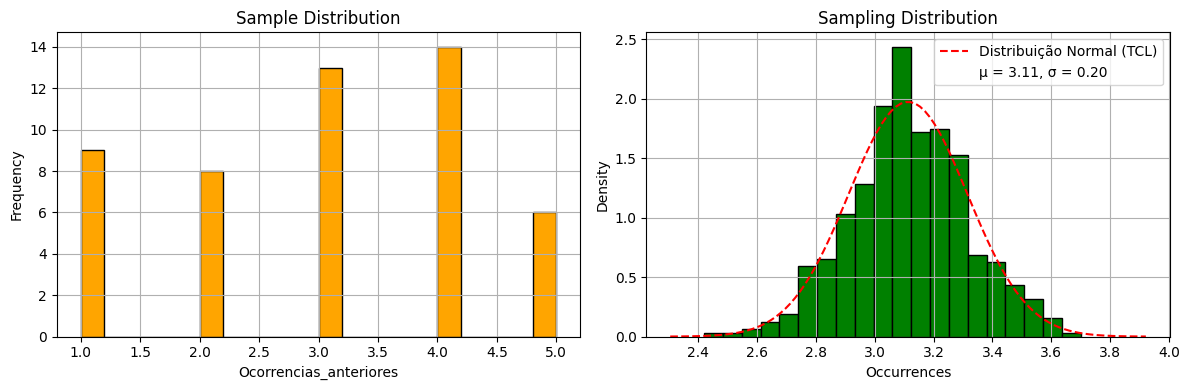

Mean of the sampling distribution (Occurrences): 3.11


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate

url = "https://raw.githubusercontent.com/ANDRERAIMUNDO/data-atividade-2/main/rootcause_success.csv"
df = pd.read_csv(url)

colum = "Ocorrencias_anteriores"

# SAMPLE DISTRIBUTION
amostra_unica = np.random.choice(df[colum], size=50, replace=True)
# SAMPLING DISTRIBUTION
n_sample = 500
size_sample = 50
medias_amostrais = [np.mean(np.random.choice(df[colum], size=size_sample, replace=True)) for _ in range(n_sample)]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(amostra_unica, bins=20, color='orange', edgecolor='black')
plt.title("Sample Distribution")
plt.xlabel(colum)
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(medias_amostrais, bins=20, color='green', edgecolor='black', density=True)
mu = np.mean(medias_amostrais)
sigma = np.std(medias_amostrais)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Distribuição Normal (TCL)')
plt.plot([], [], ' ', label=f'μ = {mu:.2f}, σ = {sigma:.2f}')
plt.title("Sampling Distribution")
plt.xlabel("Occurrences")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
print(f"Mean of the sampling distribution (Occurrences): {mu:.2f}")


# Questão B

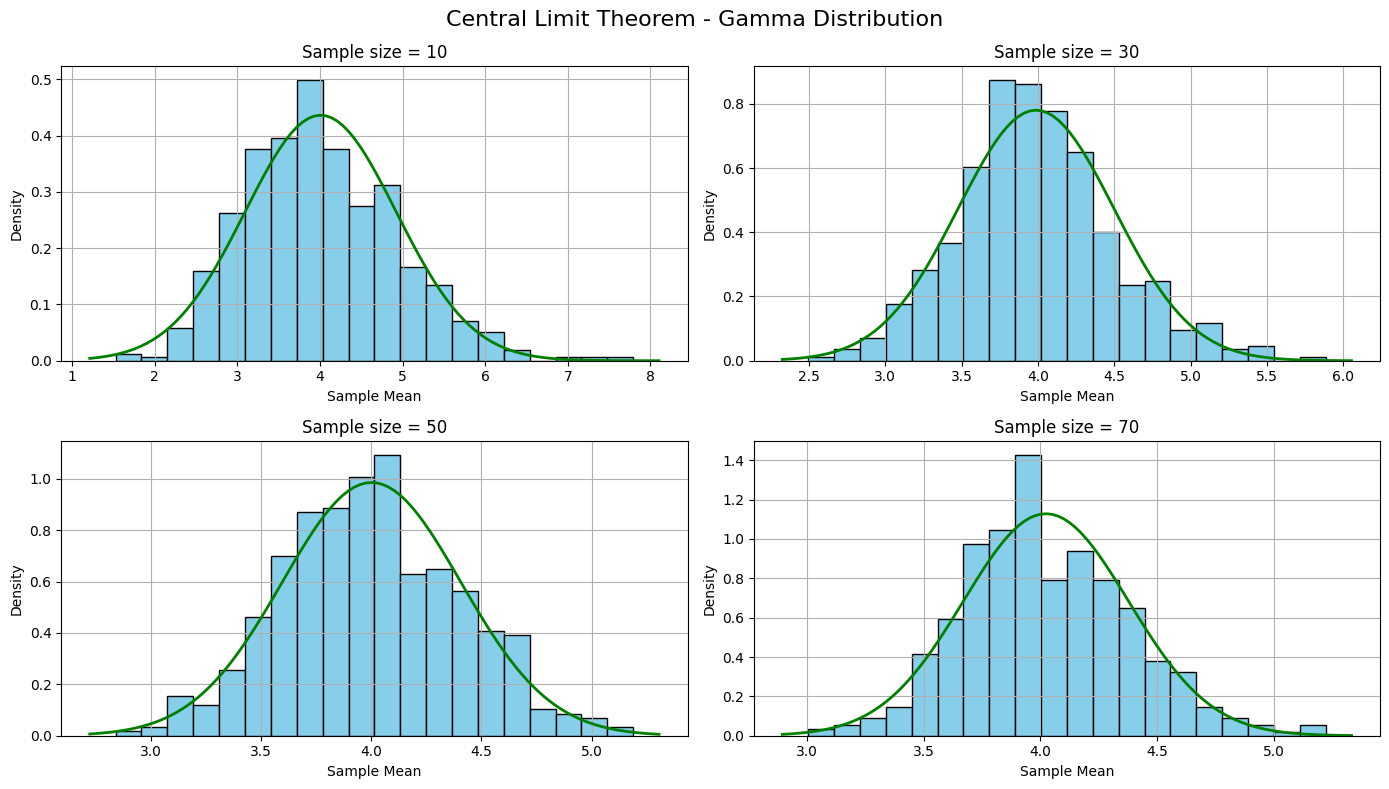

Occurrences can happen every 4.02 days


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

url = 'https://raw.githubusercontent.com/ANDRERAIMUNDO/data-atividade-2/main/rootcause_success.csv'
df = pd.read_csv(url)

previous_occurrences = df['Ocorrencias_anteriores'].dropna()

# Parameters
shape = 2.0 # α #Nota: α > 1 tenderá a uma gaussiana
scale = 2.0 # β

sample_sizes = [10, 30, 50, 70]
n_samples = 500

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

for idx, size in enumerate(sample_sizes):
    row = idx // 2
    col = idx % 2
    #gamma.rvs -> gamma distribution
    sample_means = [np.mean(gamma.rvs(shape, scale=scale, size=size)) for _ in range(n_samples)]

    axs[row][col].hist(sample_means, bins=20, color='skyblue', edgecolor='black', density=True)
    mean = np.mean(sample_means)
    std = np.std(sample_means)

    xmin, xmax = axs[row][col].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)
    axs[row][col].plot(x, y, 'g-', lw=2)

    axs[row][col].set_title(f'Sample size = {size}')
    axs[row][col].set_xlabel('Sample Mean')
    axs[row][col].set_ylabel('Density')
    axs[row][col].grid(True)

fig.suptitle('Central Limit Theorem - Gamma Distribution', fontsize=16)
plt.tight_layout()
plt.show()
print('Occurrences can happen every ' + str(round(mean, 2)) + ' days')


# Questão C

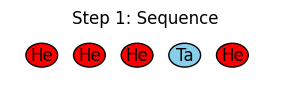

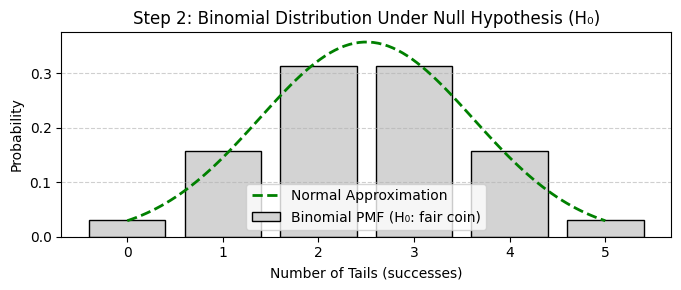

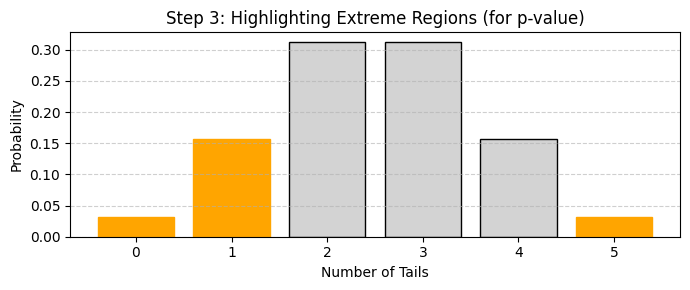

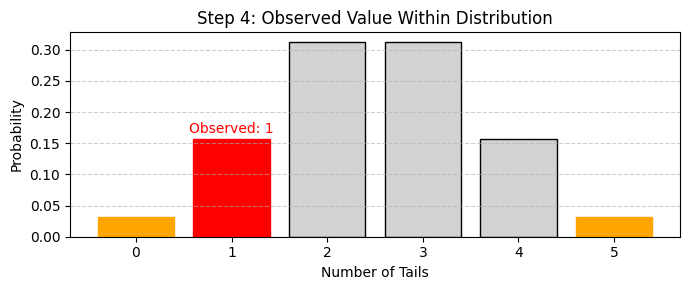

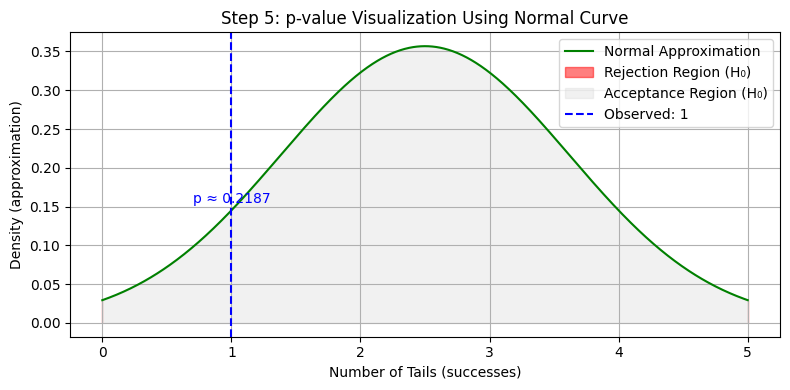

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

#Parameters
n = 5
p_null = 0.5  #50% de chance para He ou Ta
sequence = ['He', 'He', 'He', 'Ta', 'He']#sequencia da imagem da questão C
k_observed = sequence.count('Ta')
x = np.arange(0, n + 1)
##Passo 1: sequencia da imagem da questão C
fig, ax = plt.subplots(figsize=(3, 1))
for i, result in enumerate(sequence):
    color = 'red' if result == 'He' else 'skyblue'
    circle = plt.Circle((i * 1.5, 1), 0.5, color=color, ec='black')
    ax.add_patch(circle)
    ax.text(i * 1.5, 1, result, ha='center', va='center', fontsize=12)
ax.set_xlim(-1, len(sequence) * 1.5)
ax.set_ylim(0, 2)
ax.axis('off')
plt.title("Step 1: Sequence")
plt.tight_layout()
plt.show()
#Passo 2: valor k -> max 100%, k Distribuição binomial
y = binom.pmf(x, n, p_null)
plt.figure(figsize=(7, 3))
plt.bar(x, y, color='lightgray', edgecolor='black', width=0.8, label="Binomial PMF (H₀: fair coin)")
# Distribuição binomial - linha de aproximação
mean = n * p_null
std_dev = np.sqrt(n * p_null * (1 - p_null))
x_smooth = np.linspace(0, n, 100)
y_normal = norm.pdf(x_smooth, mean, std_dev)
plt.plot(x_smooth, y_normal, color='green', linestyle='--', linewidth=2, label="Normal Approximation")
#gráfico gerado formando Distribuição binomial
plt.title("Step 2: Binomial Distribution Under Null Hypothesis (H₀)")
plt.xlabel("Number of Tails (successes)")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
#Passo 3: regiões extremas poucos prováveis (Two-tailed test),metódo 'for i in extremes' destaca as extremidades
prob_obs = binom.pmf(k_observed, n, p_null)
extremes = [k for k in x if binom.pmf(k, n, p_null) <= prob_obs]
plt.figure(figsize=(7, 3))
bars = plt.bar(x, y, color='lightgray', edgecolor='black', width=0.8)
for i in extremes:
    bars[i].set_color('orange')
plt.title("Step 3: Highlighting Extreme Regions (for p-value)")
plt.xlabel("Number of Tails")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Passo 4: metódo 'bars[k_observed]' destaca o valor observável k_observed = sequence.count('Ta')
plt.figure(figsize=(7, 3))
bars = plt.bar(x, y, color='lightgray', edgecolor='black', width=0.8)
for i in extremes:
    bars[i].set_color('orange')
bars[k_observed].set_color('red')
plt.text(k_observed, y[k_observed] + 0.01, f"Observed: {k_observed}", ha='center', color='red')
plt.title("Step 4: Observed Value Within Distribution")
plt.xlabel("Number of Tails")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Passo 5:plotando e mostrando p-value
plt.figure(figsize=(8, 4))
x_norm = np.linspace(0, n, 1000)
y_norm = norm.pdf(x_norm, mean, std_dev)
plt.plot(x_norm, y_norm, label='Normal Approximation', color='green')
# gráfico área de rejeição. Nota: o valor p-value da variável k_observed é provalvente será alto porque  1 “Ta” em 5 é comum sob H₀.
x_rej_left = np.linspace(0, min(extremes), 300)
x_rej_right = np.linspace(max(extremes), n, 300)
plt.fill_between(x_rej_left, norm.pdf(x_rej_left, mean, std_dev), color='red', alpha=0.5, label='Rejection Region (H₀)')
plt.fill_between(x_rej_right, norm.pdf(x_rej_right, mean, std_dev), color='red', alpha=0.5)
#linha da curva apenas para demonstração
x_accept = np.linspace(min(extremes), max(extremes), 300)
plt.fill_between(x_accept, norm.pdf(x_accept, mean, std_dev), color='lightgray', alpha=0.3, label='Acceptance Region (H₀)')
#mostra valor observado na variável k_observed
plt.axvline(k_observed, color='blue', linestyle='--', label=f'Observed: {k_observed}')
#encontra um p-value usando 'binom.pmf()'
p_value = sum(binom.pmf(k, n, p_null) for k in extremes)
plt.text(k_observed, norm.pdf(k_observed, mean, std_dev) + 0.01, f'p ≈ {p_value:.4f}', ha='center', color='blue')

plt.title("Step 5: p-value Visualization Using Normal Curve")
plt.xlabel("Number of Tails (successes)")
plt.ylabel("Density (approximation)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
